## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 200
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_more_1 = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() > 1]
classification_counts_more_1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 1800
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts <= cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)
application_df_encoded.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df_encoded['IS_SUCCESSFUL']
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

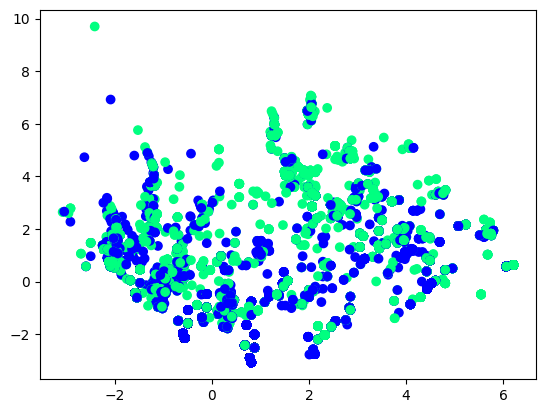

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='winter')

## Compile, Train and Evaluate the Model

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
from tensorflow.keras.layers import Dense
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(Dense(80, input_dim=X_pca.shape[1], activation='relu'))

# Second hidden layer
nn.add(Dense(30, activation='tanh'))

# Output layer
nn.add(Dense(1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                240       
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam',  metrics=['accuracy'])

In [29]:
# Train the model
history = nn.fit(X_pca, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 3s 3ms/step - loss: 0.6251 - accuracy: 0.6767
Epoch 2/100
858/858 [==============================] - 2s 3ms/step - loss: 0.6151 - accuracy: 0.6814
Epoch 3/100
858/858 [==============================] - 2s 3ms/step - loss: 0.6112 - accuracy: 0.6860
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 0.6080 - accuracy: 0.6858
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 0.6053 - accuracy: 0.6896
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 0.6035 - accuracy: 0.6933
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 0.6006 - accuracy: 0.6978
Epoch 8/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5990 - accuracy: 0.6987
Epoch 9/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5981 - accuracy: 0.6989
Epoch 10/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5965 - accura

In [32]:
# Evaluate the model using the test data
X_test_pca = pca.transform(X_test_scaled)
model_loss, model_accuracy = nn.evaluate(X_test_pca,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5773 - accuracy: 0.7082 - 1s/epoch - 5ms/step
Loss: 0.5772717595100403, Accuracy: 0.7081632614135742


In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [33]:
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(Dense(80, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn2.add(Dense(40, activation='relu'))

nn2.add(Dense(30, activation='tanh'))


# Output layer
nn2.add(Dense(1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                3520      
                                                                 
 dense_10 (Dense)            (None, 40)                3240      
                                                                 
 dense_11 (Dense)            (None, 30)                1230      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8021 (31.33 KB)
Trainable params: 8021 (31.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
nn2.compile(loss='binary_crossentropy',optimizer='adam',  metrics=['accuracy'])

In [35]:
history2 = nn2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5681 - accuracy: 0.7223
Epoch 2/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5546 - accuracy: 0.7308
Epoch 3/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5524 - accuracy: 0.7312
Epoch 4/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5504 - accuracy: 0.7316
Epoch 5/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5500 - accuracy: 0.7328
Epoch 6/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5491 - accuracy: 0.7335
Epoch 7/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5482 - accuracy: 0.7333
Epoch 8/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5471 - accuracy: 0.7332
Epoch 9/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5469 - accuracy: 0.7347
Epoch 10/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5461 - accura

In [36]:
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5604 - accuracy: 0.7188 - 473ms/epoch - 2ms/step
Loss: 0.5604387521743774, Accuracy: 0.718804657459259


In [37]:
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(Dense(80, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn3.add(Dense(40, activation='relu'))

nn3.add(Dense(30, activation='tanh'))


# Output layer
nn3.add(Dense(1, activation='Softmax'))

# Check the structure of the model
nn3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 80)                3520      
                                                                 
 dense_14 (Dense)            (None, 40)                3240      
                                                                 
 dense_15 (Dense)            (None, 30)                1230      
                                                                 
 dense_16 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8021 (31.33 KB)
Trainable params: 8021 (31.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
nn3.compile(loss='binary_crossentropy',optimizer='adam',  metrics=['accuracy'])

In [39]:
history3 = nn3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 4s 3ms/step - loss: 0.5672 - accuracy: 0.5323
Epoch 2/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5549 - accuracy: 0.5323
Epoch 3/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5517 - accuracy: 0.5323
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5506 - accuracy: 0.5323
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.5323
Epoch 6/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5491 - accuracy: 0.5323
Epoch 7/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5478 - accuracy: 0.5323
Epoch 8/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5474 - accuracy: 0.5323
Epoch 9/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.5323
Epoch 10/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5467 - accura

In [40]:
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5562 - accuracy: 0.5328 - 449ms/epoch - 2ms/step
Loss: 0.5561956763267517, Accuracy: 0.5327988266944885


In [43]:
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(Dense(80, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn4.add(Dense(60, activation='relu'))

nn4.add(Dense(60, activation='relu'))


# Output layer
nn4.add(Dense(1, activation='sigmoid'))

# Check the structure of the model
nn4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 80)                3520      
                                                                 
 dense_26 (Dense)            (None, 60)                4860      
                                                                 
 dense_27 (Dense)            (None, 60)                3660      
                                                                 
 dense_28 (Dense)            (None, 1)                 61        
                                                                 
Total params: 12101 (47.27 KB)
Trainable params: 12101 (47.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
nn4.compile(loss='binary_crossentropy',optimizer='adam',  metrics=['accuracy'])

In [45]:
history4 = nn4.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 4s 3ms/step - loss: 0.5675 - accuracy: 0.7226
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5536 - accuracy: 0.7314
Epoch 3/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7309
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7337
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7338
Epoch 6/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5476 - accuracy: 0.7339
Epoch 7/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5473 - accuracy: 0.7357
Epoch 8/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5461 - accuracy: 0.7356
Epoch 9/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7347
Epoch 10/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5454 - accura

In [46]:
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5633 - accuracy: 0.7222 - 674ms/epoch - 3ms/step
Loss: 0.5633124113082886, Accuracy: 0.7221574187278748


In [47]:
nn2.save("AlphabetSoupCharity_Optimization.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
